# notebook for Semiflex brush wetted by flexible polymer with corresponding interactions with the solvent 

I use input files stored at dir ../namics/inputs. I make a few changes. Store the file locally in the directory from where jupyther was lounched. Then I run the problem using 'namics' stored in ../namics/inputs. The program saves the results locally in the output folder (subdirctory of the lounche directory). Then I load the 'profile, or kal data' and plot the 'density profiles' or analyse the 'kal' files. 


methods to automate the 'handle' of input_file:

df=insert(inx,df,typ,name,prop,val)

df=append(df,type,name,prop,val)

df=delete(idx,df)

df=comment(idx,df)

df=uncomment(idx,df)

df=puttype(idx,df,value)

df=putname(idx,df,value)

df=putprop(idx,df,value)

df=putvalue(idx,df,value)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="../namics/inputs/"

#Adjust path depending on from where you run the jupyter notebook and where you can find the inputfile.

def insert(idx,df,typ,name,prop,val): 
    dfA = df.iloc[:idx,] 
    dfB = df.iloc[idx:,]
    line=df.iloc[-1]
    line[0]=typ
    line[1]=name
    line[2]=prop
    line[3]=val
    df = dfA.append(line).append(dfB).reset_index(drop = True) 
    return df
def append(df,typ,name,prop,val):
    idx = df.index
    number = len(idx)
    dfA = df.iloc[:number,] 
    dfB = df.iloc[number:,]
    line=df.iloc[-1]
    line[0]=typ
    line[1]=name
    line[2]=prop
    line[3]=val
    df = dfA.append(line).append(dfB).reset_index(drop=True)
    line=df.iloc[-1]
    line[0]="//ignore"
    line[1]=""
    line[2]=""
    line[3]=""
    df = dfA.append(line).append(dfB).reset_index(drop=True)
    return df
def delete(idx,df):
    dfA=df.iloc[:idx,]
    dfB=df.iloc[idx+1:,]
    df=dfA.append(dfB).reset_index(drop=True)
    return df
def comment(idx,df):
    line=df.iloc[idx]
    x=line[0]
    x="//"+x
    line[0]=x
    return df
def uncomment(idx,df):
    line=df.iloc[idx]
    x=line[0]
    x=x[2:]
    line[0]=x
    return df
def putvalue(idx,df,value):
    line=df.iloc[idx]
    line[3]=value
    return df
def puttype(idx,df,value):
    line=df.iloc[idx]
    line[0]=value
    return df
def putname(idx,df,value):
    line=df.iloc[idx]
    line[1]=value
    return df
def putprop(idx,df,value):
    line=df.iloc[idx]
    line[2]=value
    return df


# Read inputfile

First thing to do is to read the input file. I use pandas (pd) for this. The input file has a ':' as separator and the inputfile is without any heades. The path is defined above. 

In [5]:
input=pd.read_csv(path+"brush_int.in",sep=':',header=None)
input

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,mon,S,freedom,frozen
5,mon,S,frozen_range,1;1
6,mon,W,freedom,free
7,mon,A,freedom,free
8,mon,G,freedom,free
9,mon,X,freedom,pinned


In [176]:
input=putvalue(30,input,19)

# Modify and change inputfile

You can use the 'methods' defined above to modify the inputfile. You can automate this using python code.
The saving is done with separator ':', index and headers are not included. I put the inputfile in the directory from where you have started the jupyter notebook

In [177]:
input.to_csv("brush_int.in",sep=':',header=False,index=False)

# Run 'namics'

In my case the namics executable is sitting at ../namics/inputs/ directory. I redirect the output to the BB.out file. If this is not done, all the output is comming to the notebook. In the 'tab' you can see when the program is finished.

In [7]:
!../namics/inputs//namics brush_int.in >BB.out

In [76]:
#ls output

# Read and plot the results

I have requested the so-called profile plots to be saved in the output folder. This folder is a subdirectory of the directory from where you have started the jupyter nootbook. If this folder is absent, namics will issue an error. Please generate this folder before you execut
e the program. The so-called 'kal'-file is also opened below. Some modifications are made and the new kal dataframe is saved again. This is in the local directory from where you have started the jupyter notebook.

In [2]:
kal=pd.read_csv("output/brush_int.kal",sep='\t')
kal.tail()

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_pol_phiM
989,11,NaN,NaN,NaN
990,10,NaN,NaN,NaN
991,9,NaN,NaN,NaN
992,8,NaN,NaN,NaN
993,7,NaN,NaN,NaN


In [15]:
kal.tail()

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_pol_phiM
977,23,-4.347142,-0.683030,0.232979
978,22,-4.313117,-0.721783,0.244091
979,21,-4.275322,-0.765225,0.256299
980,20,-4.233096,-0.814266,0.269775
981,19,-4.185611,-0.870074,0.284728


In [14]:
kal=delete(982,kal)

In [16]:
N=2000
s=5/2000
v=1
H0=pow(8*v*s/np.pi/np.pi,1.0/3.0)*N
D=kal.lat_flat_n_layers*2
F0=kal.sys_noname_free_energy[0]
x=D
y=(kal.sys_noname_free_energy-F0)*2

df=[0.0]*len(x)
for i in range(1,len(y)):
    df[i]=-(y[i]-y[i-1])/(x[i]-x[i-1])
df[0]=df[1]

In [17]:
kal["P_D"]=1/2*pow(np.pi*s/2,4.0/3.0)*pow(2*H0/D-pow(D/(2*H0),2),2)
kal["strong"]=1/1 * pow(2*s*N/D,2)

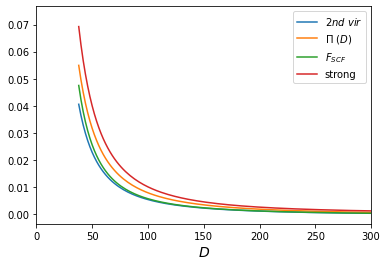

In [85]:
plt.plot(D,kal.mol_pol_phiM*kal.mol_pol_phiM/2,label=r'$2^{nd} \ vir$')
plt.plot(D,kal.P_D,label=r'$\Pi (D)$')
plt.plot(D,df,label=r'$F_{SCF}$')
plt.plot(D,kal.strong,label="strong")

plt.legend(loc="best")
plt.xlim([0, 300])
plt.xlabel("$D$",fontsize=14)
#plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.show()

In [6]:
input=pd.read_csv(path+"Two_brushes_interactingSurfaceBC.in",sep=':',header=None)
input

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [10]:
input=putvalue(22,input,"2.5")

In [12]:
input

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [174]:
input=putvalue(39,input,27)

In [23]:
input=pd.read_csv("Two_brushes_interactingSurfaceBC.in",sep=':',header=None)
input

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [175]:
input.to_csv("Two_brushes_interactingSurfaceBC.in",sep=':',header=False,index=False)

In [112]:
!../namics/inputs//namics Two_brushes_interactingSurfaceBC.in >BB.out

In [20]:
kal2=pd.read_csv("output/Two_brushes_interactingSurfaceBC.kal",sep='\t')
kal2.tail()

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax
969,31,-6.433752,-1.108886,0.749898
970,30,-6.394550,-1.153284,0.741567
971,29,-6.352343,-1.201410,0.732672
972,28,-6.306773,-1.253760,0.723151
973,27,-6.257421,-1.310920,0.712938


In [19]:
kal2.tail()

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax
969,31,-6.433752,-1.108886,0.749898
970,30,-6.394550,-1.153284,0.741567
971,29,-6.352343,-1.201410,0.732672
972,28,-6.306773,-1.253760,0.723151
973,27,-6.257421,-1.310920,0.712938


In [21]:
N1=2000
s1=5/2000
N2=1000
s2=2.5/1000
s=pow(s1*s2,1/2)
v=1
H1=pow(8*v*s1/np.pi/np.pi,1.0/3.0)*N1
H2=pow(8*v*s2/np.pi/np.pi,1.0/3.0)*N2

D=kal2.lat_flat_n_layers
F0=kal2.sys_noname_free_energy[0]
x2=D
y2=(kal2.sys_noname_free_energy-F0)

df2=[0.0]*len(x2)
for i in range(1,len(y2)):
    df2[i]=-(y2[i]-y2[i-1])/(x2[i]-x2[i-1])
df2[0]=df2[1]

In [29]:
kal2["P_D"]=1/2*pow(np.pi*s/2,4.0/3.0)*pow((H1+H2)/D-pow(D/(H1+H2),2),2)
kal2["mol_pol_phiM"]=1-kal2.mol_water_phiMax
kal2["strong"]=pow((s*N1+s*N2)/D,2)

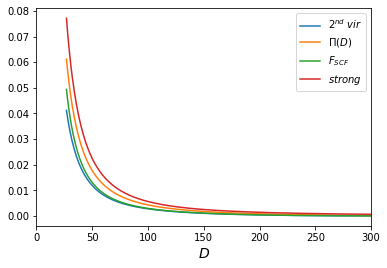

In [30]:
plt.plot(D,kal2.mol_pol_phiM*kal2.mol_pol_phiM/2,label=r'$2^{nd} \ vir$')
plt.plot(D,kal2.P_D,label=r'$\Pi (D)$')
plt.plot(D,df2,label=r'$F_{SCF}$')
plt.plot(D,kal2.strong,label=r'$strong$')

plt.legend(loc="best")
plt.xlim([0, 300])
#plt.ylim([0, 0.05])
plt.xlabel("$D$",fontsize=14)
#plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.show()

In [31]:
input3=pd.read_csv("Two_brushes_interactingSurfaceBC_a.in",sep=':',header=None)
input3

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [36]:
#input3=putvalue(20,input3,"(X1)1(A)498(G)1")
#input3=putvalue(22,input3,10)
#input3

In [34]:
input.to_csv("Two_brushes_interactingSurfaceBC_a.in",sep=':',header=False,index=False)

In [35]:
!../namics/inputs//namics Two_brushes_interactingSurfaceBC_a.in >BB.out

In [82]:
kal3=pd.read_csv("output/Two_brushes_interactingSurfaceBC_a.kal",sep='\t')
kal3.tail()

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax
969,31,-6.433752,-1.108886,0.749898
970,30,-6.394550,-1.153284,0.741567
971,29,-6.352343,-1.201410,0.732672
972,28,-6.306773,-1.253760,0.723151
973,27,-6.257421,-1.310920,0.712938


In [43]:
#kal3=delete(974,kal3)

In [83]:
N1=2000
s1=5/2000
N2=500
s2=10/500
s=pow(s1*s2,1/2)
v=1
H1=pow(8*v*s1/np.pi/np.pi,1.0/3.0)*N1
H2=pow(8*v*s2/np.pi/np.pi,1.0/3.0)*N2

D=kal3.lat_flat_n_layers
F0=kal3.sys_noname_free_energy[0]
x3=D
y3=(kal3.sys_noname_free_energy-F0)

df3=[0.0]*len(x3)
for i in range(1,len(y3)):
    df3[i]=-(y3[i]-y3[i-1])/(x3[i]-x3[i-1])
df3[0]=df3[1]

In [84]:
kal3["P_Dw"]=1/2*pow(np.pi*s/2,4.0/3.0)*pow((H1+H2-D)/(H1*pow(s2/s1,1)+H2*pow(s1/s2,1)),2)
kal3["P_DS"]=(s1/s2)*pow((s1*N1+s2*N2)/D,2)
kal3["mol_pol_phiM"]=1-kal3.mol_water_phiMax

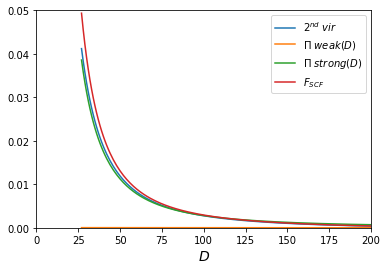

In [86]:
plt.plot(D,kal3.mol_pol_phiM*kal3.mol_pol_phiM/2,label=r'$2^{nd} \ vir$')
plt.plot(D,kal3.P_Dw,label=r'$\Pi \ weak (D)$')
plt.plot(D,kal3.P_DS,label=r'$\Pi \ strong (D)$')
plt.plot(D,df3,label=r'$F_{SCF}$')

plt.legend(loc="best")
plt.xlim([0, 200])
plt.ylim([0, 0.05])
plt.xlabel("$D$",fontsize=14)
#plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.savefig('N2000_5N500_10.png')
plt.show()

In [117]:
Htot=H1+H2
Htot


379.63362463713736

In [119]:
result=pow(np.pi/2,4/3)/2
result

0.9129840149218885

In [3]:
res2=pow(8.0/np.pi/np.pi,1.0/3.0)
res2

0.9323881540708232

In [44]:
#input4=pd.read_csv("Two_brushes_interactingSurfaceBC_b.in",sep=':',header=None)
#input4

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [45]:
#input4=putvalue(39,input4,68)

In [46]:
#input4.to_csv("Two_brushes_interactingSurfaceBC_b.in",sep=':',header=False,index=False)

In [47]:
#!../namics/inputs//namics Two_brushes_interactingSurfaceBC_b.in>BB.out

In [76]:
kal4=pd.read_csv("output/Two_brushes_interactingSurfaceBC_b.kal",sep='\t')
kal4.tail(20)

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax
913,87,-17.380302,-2.754917,0.769612
914,86,-17.348227,-2.792925,0.766845
915,85,-17.315301,-2.832006,0.764015
916,84,-17.281490,-2.872205,0.761121
917,83,-17.246759,-2.913571,0.758158
918,82,-17.211071,-2.956155,0.755127
919,81,-17.174388,-3.000014,0.752022
920,80,-17.136667,-3.045204,0.748844
921,79,-17.097867,-3.091787,0.745585
922,78,-17.057940,-3.139830,0.742249


In [77]:
N1=2000
s1=10/N1
N2=1000
s2=10/N2
s=pow(s1*s2,1/2)
v=1
H1=pow(8*v*s1/np.pi/np.pi,1.0/3.0)*N1
H2=pow(8*v*s2/np.pi/np.pi,1.0/3.0)*N2

D=kal4.lat_flat_n_layers
F0=kal4.sys_noname_free_energy[0]
x4=D
y4=(kal4.sys_noname_free_energy-F0)

df4=[0.0]*len(x4)
for i in range(1,len(y4)):
    df4[i]=-(y4[i]-y4[i-1])/(x4[i]-x4[i-1])
df4[0]=df4[1]

In [79]:
kal4["P_Dw"]=1/2*pow(np.pi*s/2,4.0/3.0)*pow((H1+H2-D)/(H1*pow(s2/s1,1)+H2*pow(s1/s2,1)),2)
kal4["P_DS"]=(s1/s2)*pow((s1*N1+s2*N2)/D,2)
kal4["mol_pol_phiM"]=1-kal4.mol_water_phiMax
kal4

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax,P_Dw,P_DS,mol_pol_phiM
0,1000,-19.042353,-0.638181,1.000000,0.000524,0.000200,-2.886580e-15
1,999,-19.042353,-0.638181,1.000000,0.000522,0.000200,0.000000e+00
2,998,-19.042353,-0.638181,1.000000,0.000520,0.000201,0.000000e+00
3,997,-19.042353,-0.638181,1.000000,0.000518,0.000201,0.000000e+00
4,996,-19.042353,-0.638181,1.000000,0.000516,0.000202,0.000000e+00
...,...,...,...,...,...,...,...
928,72,-16.791799,-3.462994,0.720330,0.000456,0.038580,2.796703e-01
929,71,-16.742452,-3.523497,0.716325,0.000458,0.039675,2.836754e-01
930,70,-16.691498,-3.586171,0.712211,0.000460,0.040816,2.877891e-01
931,69,-16.638855,-3.651137,0.707978,0.000462,0.042008,2.920218e-01


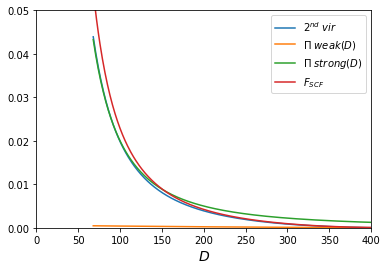

In [80]:
plt.plot(D,kal4.mol_pol_phiM*kal4.mol_pol_phiM/2,label=r'$2^{nd} \ vir$')
plt.plot(D,kal4.P_Dw,label=r'$\Pi \ weak (D)$')
plt.plot(D,kal4.P_DS,label=r'$\Pi \ strong (D)$')
plt.plot(D,df4,label=r'$F_{SCF}$')

plt.legend(loc="best")
plt.xlim([0, 400])
plt.ylim([0, 0.05])
plt.xlabel("$D$",fontsize=14)
#plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.savefig('N2000_10N1000_10.png')
plt.show()

In [116]:
#%%bash
#at now
#../namics/inputs//namics Two_brushes_interactingSurfaceBC_b.in>BB.out


In [57]:
input4


,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [65]:
input4=putvalue(22,input4,2.5)
input4=putvalue(39,input4,50)
input4

,0,1,2,3
0,lat,flat,n_layers,1000
1,lat,flat,lattice_type,simple_cubic
2,lat,flat,geometry,planar
3,lat,flat,gradients,1
4,lat,flat,lowerbound,surface
5,lat,flat,upperbound,surface
6,mon,S,freedom,frozen
7,mon,S,frozen_range,lowerbound
8,mon,S1,freedom,frozen
9,mon,S1,frozen_range,upperbound


In [66]:
input4.to_csv("Two_brushes_interactingSurfaceBC_c.in",sep=':',header=False,index=False)


In [68]:
!../namics/inputs//namics Two_brushes_interactingSurfaceBC_c.in>BB.out

In [69]:
kal5=pd.read_csv("output/Two_brushes_interactingSurfaceBC_c.kal",sep='\t')
kal5.tail(20)

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax
931,69,-11.223820,-1.310568,0.816499
932,68,-11.204187,-1.332525,0.813733
933,67,-11.183912,-1.355233,0.810886
934,66,-11.162961,-1.378732,0.807954
935,65,-11.141303,-1.403064,0.804934
936,64,-11.118902,-1.428274,0.801824
937,63,-11.095719,-1.454411,0.798617
938,62,-11.071713,-1.481527,0.795309
939,61,-11.046842,-1.509678,0.791894
940,60,-11.021058,-1.538925,0.788368


In [ ]:
kal5=delete(x,kal5)

In [70]:
N1=2000
s1=10/N1
N2=1000
s2=2.5/N2
s=pow(s1*s2,1/2)
v=1
H1=pow(8*v*s1/np.pi/np.pi,1.0/3.0)*N1
H2=pow(8*v*s2/np.pi/np.pi,1.0/3.0)*N2

D=kal5.lat_flat_n_layers
F0=kal5.sys_noname_free_energy[0]
x5=D
y5=(kal5.sys_noname_free_energy-F0)

df5=[0.0]*len(x5)
for i in range(1,len(y5)):
    df5[i]=-(y5[i]-y5[i-1])/(x5[i]-x5[i-1])
df5[0]=df5[1]

In [72]:
kal5["P_Dw"]=1/2*pow(np.pi*s/2,4.0/3.0)*pow((H1+H2-D)/(H1*pow(s2/s1,1)+H2*pow(s1/s2,1)),2)
kal5["P_DS"]=(s2/s1)*pow((s1*N1+s2*N2)/D,2)
kal5["mol_pol_phiM"]=1-kal5.mol_water_phiMax
kal5

,lat_flat_n_layers,sys_noname_free_energy,sys_noname_grand_potential,mol_water_phiMax,P_Dw,P_DS,mol_pol_phiM
0,1000,-12.073312,-0.283111,1.000000,0.000889,0.000078,0.000000e+00
1,999,-12.073312,-0.283111,1.000000,0.000886,0.000078,0.000000e+00
2,998,-12.073312,-0.283111,1.000000,0.000882,0.000078,0.000000e+00
3,997,-12.073312,-0.283111,1.000000,0.000879,0.000079,0.000000e+00
4,996,-12.073312,-0.283111,1.000000,0.000876,0.000079,-2.220446e-16
...,...,...,...,...,...,...,...
946,54,-10.844090,-1.741491,0.764534,0.000443,0.026792,2.354663e-01
947,53,-10.810271,-1.780584,0.760047,0.000445,0.027812,2.399528e-01
948,52,-10.775007,-1.821483,0.755391,0.000447,0.028892,2.446090e-01
949,51,-10.738206,-1.864317,0.750555,0.000450,0.030037,2.494447e-01


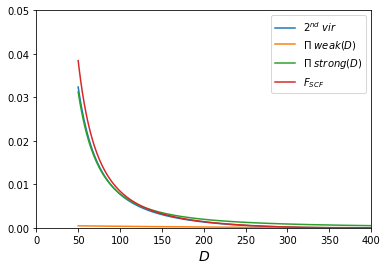

In [74]:
plt.plot(D,kal5.mol_pol_phiM*kal5.mol_pol_phiM/2,label=r'$2^{nd} \ vir$')
plt.plot(D,kal5.P_Dw,label=r'$\Pi \ weak (D)$')
plt.plot(D,kal5.P_DS,label=r'$\Pi \ strong (D)$')
plt.plot(D,df5,label=r'$F_{SCF}$')

plt.legend(loc="best")
plt.xlim([0, 400])
plt.ylim([0, 0.05])
plt.xlabel("$D$",fontsize=14)
#plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.savefig('N2000_10N1000_2_5.png')
plt.show()